<h1><center> Missing Data Imputation</center></h1>
<h3><center> Bin Yu, Nuoya Rezsonya, Yejur Singh Kunwar, Iram Bakhtiar</center></h3>

# Contents

1. [Abstract](#Abstract)
2. [Introduction](#Introduction)
3. [Background](#Background)
4. [Methods](#Methods)
5. [Results](#Results)
6. [Conclusion](#Conclusion)
7. [References](#References)
8. [Appendix: Code](#Appendix)

# Abstract




[Back to Contents](#Contents)

# Introduction

There is a misconception from people who are not in Data Science field. The data is perfect. There is no missing data. The recorded information is clear and mistake free. This is never the reality. Garbage in, Garbage out is the general term to explain why Data Scientists are spending most of their time cleaning up data. Data will be missing, incorrectly recorded and they may come from different resources. There can be columns that are more than 50% recorded wrong or missing. Most machine learing algorithms have the assumption that all values are presenting and they have meaningful values. It is highly not recommended to train models with not comprehensive datasets.

If one gets rid of the missing observations that have missing data, one risks losing information. Then the question becomes how to deal with the problemetic data. It is called imputation. Data Scientists will explore the data and make decisions on the best way to handle the problem. 

In this project, we will demonstrate imputation through analyzing Boston Housing dataset, following 4 steps and answer the following questions:

- Using Sklearn get the Boston Housing dataset. Fit a linear regressor to the data as a baeline. There is no need to do Cross-Validation. We are exploring the change in results. What is the loss and what are the goodness of fit parameters? This will be our baseline for comparison


- For select between 1, 5 10, 20, 33, and 50% of your data on a single column (Completely at random), replace the present value with a NAN and then perform an imputation of that value. In each case perform a fit with the imputed data and compare the loss and goodness of fit to your baseline.


- Take 2 different columns and create data “Missing at Random” when controlled for a third variable (i.e if Variable Z is > 30, than Variables X, Y are randomly missing). Make runs with 10%, 20% and 30% missing data imputed via your best guess. Repeat your fit and comparisons to the baseline.


- Create a Missing Not at Random pattern in which 25% of the data is missing for a single column. Impute your data, fit the results and compare to a baseline.


- Extra Credit: Using the MCMC method, and your data from step 4, What is the difference in performance between imputation via ‘guess’ (mean/median, etc) and MCMC.

[Back to Contents](#Contents)

# Background


## Dataset

We will be using Boston Housing dataset to demonstrate the missing data mechanism and imputation techiniques. The dataset comes from Python scikit-leanr library. The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. A baseline model will be constructed to predict the value of the MEDV column. 

Boston Housing Data contains 14 attributes and 506 rows of observations. The following describes the dataset columns:

| Column Names | Description |
|------|------|
|CRIM|per capita crime rate by town|
|ZN|proportion of residential land zoned for lots over 25,000 sq.ft.
|INDUS| proportion of non-retail business acres per town.
|CHAS| Charles River dummy variable (1 if tract bounds river; 0 otherwise)
|NOX| nitric oxides concentration (parts per 10 million)
|RM| average number of rooms per dwelling
|AGE| proportion of owner-occupied units built prior to 1940
|DIS| weighted distances to five Boston employment centres
|RAD| index of accessibility to radial highways
|TAX| full-value property-tax rate per \$10,000
|PTRATIO| pupil-teacher ratio by town
|B| 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
|LSTAT| \% lower status of the population
|MEDV| Median value of owner-occupied homes in \$1000's

<center><b>Table 1. Table of Attributes in Boston Housing Dataset</center>
    
## Missing Data Mechanism

In order to impute data, let us give a brief introduction of missing data. There are three main categories of missing data:
- Missing completely at random (MCAR) 

As the name shows, it is very straightforward. The propensity for a data point to be missing is completely random. There is no relationship between whther a data point is missing and any values in the data set. The missing data are just a random subset of the data. [1]

- Missing at random (MAR)

Different from the MCAR, MAR means the likelihood for a data point to be missing is not related to the missing data, but it is related to some of the observed data. For example, a person from a school department that had a survery to investigate how students think about a course, whether or not one student answered the last question on that survey has nothing to do with the missing values, but it does have to do with the values of some other variable. In other words, the missing data is conditional on another variable or there can be a relationship between missingness and the "another variable". Maybe a better name can be Missing Conditionally at Random. [1]

- Not missing at random (NMAR)

Neither MCAR or MAR. The value of the variable that is missing is related to the reason it is missing. It means there is a relationship between the likelihood of a value to be missing and its values. MNAR is called “non-ignorable” because the missing data mechanism itself has to be modeled as you deal with the missing data. [1] For example, people with very high or very low salaries will be less likely to reveal their salary range during a survey. 


[Back to Contents](#Contents)

# Methods

## Handling Missing Data 

There are many ways to approach missing data. We have already discussed about the missing data mechanism. For MCAR and MCR, It is safer to remove data with missing values depending on their occurrances but it is not the same for the NMAR.[2] We are introducing several popular ways of data imputation for cross-sectional data. 

- **Nothing** 

The easiest one is to do nothing. Under this situation, you just let the algorithm handle the missing data. XGBoost is one of the algorithms that could factor in missing values and learn the best imputation values for missing values based on the training loss reduction. But other algorithms just simply cannot stop complaining about missing values. 

- **Imputation**

For general problems(Time-Series is another story), we have categorical imputation and numerical imputation. Since this project is mainly doing numerical imputation, we will be only talking about numerical imputation methods below.[2]

    - Imputation Using Mean or Median Values: 
Replace the missing values with the mean of median of the column that contains missing values. This is an easy and fast method. It does work really well with small numerical methods. But it will not factor the correlation between features. It is also only working at column level. If a column that is numerical representing the encoded categorical features, it works very poorly. 
    
    -Imputation Using Mode Values
    
Most Frequent is another statistical strategy to impute missing values. This method works well with categorical features by replacing missing data with the most frequent values within each column. This method also does not factor the correlations between factors. It also introduces class bias to the data. 
    
    -Imputation Using Zeros or A Constant
    
As the name shows, replace missing values with zeros and a constant value. This method is probably the least favorite. 

    -Imputation Using k-NN
    
The k-nn is the classification algorithm. Feature similarity is the base logic of the algorithm to predict the values of any new data points. This technique can be used to impute data. By using this algorithm, it is making prediction on the missing values by finding the k nearest neighbours to the observation with missing data and then imputing them based on the non-missing values in the neighbourhood.

    -Hot Deck
The hot deck method takes imputation one step further. This method again looks for trends in other columns to help impute the missing values. It has the advantage that we are constrained to only possible values. For example, if a survey is only performing in a certain age, let us say 20 to 30, then it will be constrained within this age range. 

- **Deletion**

There are three main methods of deletions.[2]

    -Likewise Deletion
    
It removes all data for any rows that have even one missing values. Particularly if the missing data is limited to a small number of observations, you may just opt to eliminate those cases from the analysis. In most cases, the method is not in favor because it is a complete case removal. It is under the assumption of missing completely at random which this is a huge assumption. This method can introduce biases.

    -Pairwise Deletion

Pairwise deletion is ommiting a row of data if a value is missing in a given column(s), but the same row of other columns are kept. It increases the power in the analysis but it also has so many drawbacks. It assumes that the missing data are MCAR. If you delete pairwise then you’ll end up with different numbers of observations contributing to different parts of your model, which can make interpretation difficult. 

## Loss Function

A base linear regression model will be constructed as the baseline model to start with. The loss function will be the common loss function for regression model -- Root Mean Squared Error (RMSE). 

Root Mean Square Error (RMSE) is the standard deviation of the residuals or model prediction errors. Prediction errors are a measure of how far apart the real data and the predicted data is. RMSE is a measure of how spread out these prediction errors are. In other words, it tells you how concentrated the data is around the line of best fit. The only reason RMSE is picked over MAE and MSE is that RMSE penalizes outliers more than MAE. The calculation formula of RMSE is as below:
<center><img src='RMSE.png'></center>


[Back to Contents](#Contents)

# Results

## Baseline Model

The first step is to construct a baseline model that will train a linear regression model on all features. We are using all 506 rows of observations since there is no cross validation needed for this step. This baseline model is supporting the futher analysis of the imputation influencing based on different missing data mechanism(MCAR, MAR, NMAR). There are 4 different evaluation metrics provided - MAE, MSE, RMSE and R squared. We will be evaluating the model performance based on RMSE only. 

As mentioned above, the baseline model is built to predict the MEDV	column. This numeric column contains the median value of owner-occupied homes in $1000's. Other 13 columns are treated as features and are standardizd before being put into the model. 

The performance of the baseline model as below. The RMSE of this baseline model is 4.679191 which is the baseline for comparison. 

<center><img src='baseline_performance.png'></center>

<center><b>Table 1. Baseline Model Performance.</b> The RMSE value of this baseline model is 4.679191. This is the baseline of model performance for comparison.</center>

[Back to Contents](#Contents)

# Conclusion




[Back to Contents](#Contents)

# References

[1]https://www.theanalysisfactor.com/missing-data-mechanism/

[2]https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4

[3] https://www.kaggle.com/prasadperera/the-boston-housing-dataset

[4] https://datascience.stackexchange.com/questions/30245/is-there-a-way-to-replace-existing-values-with-nan?rq=1

[5] https://www.kaggle.com/prasadperera/the-boston-housing-dataset

[6] https://sdsawtelle.github.io/blog/output/mcmc-in-python-with-pymc.html

[Back to Contents](#Contents)

# Appendix: Codes




[Back to Contents](#Contents)

In [1]:
#!pip install ml_metrics 
#!pip install pymc 
#!pip install pymc3

### Import Packages

In [2]:
import numpy as np
import pandas as pd
import csv
from sklearn.linear_model import LinearRegression
import seaborn as sns;
from sklearn.metrics import mean_absolute_error, make_scorer, mean_squared_error, r2_score 
from ml_metrics import rmse
import matplotlib.pyplot as plt
import warnings
import random
from sklearn import preprocessing
import pymc3 
from scipy.stats import norm

log = np.log
pi = np.pi

warnings.simplefilter('ignore')

%matplotlib inline

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\jrezs\Anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


### Import data and exploring

In [3]:
# import data from csv file
# dataset downloaded from https://github.com/selva86/datasets/blob/master/BostonHousing.csv

file ="BostonHousing.csv"
df_housing = pd.read_csv(file) 

In [4]:
df_housing.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
b          506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [6]:
df_housing = df_housing.astype({"chas": float, "rad": float, "tax": float})

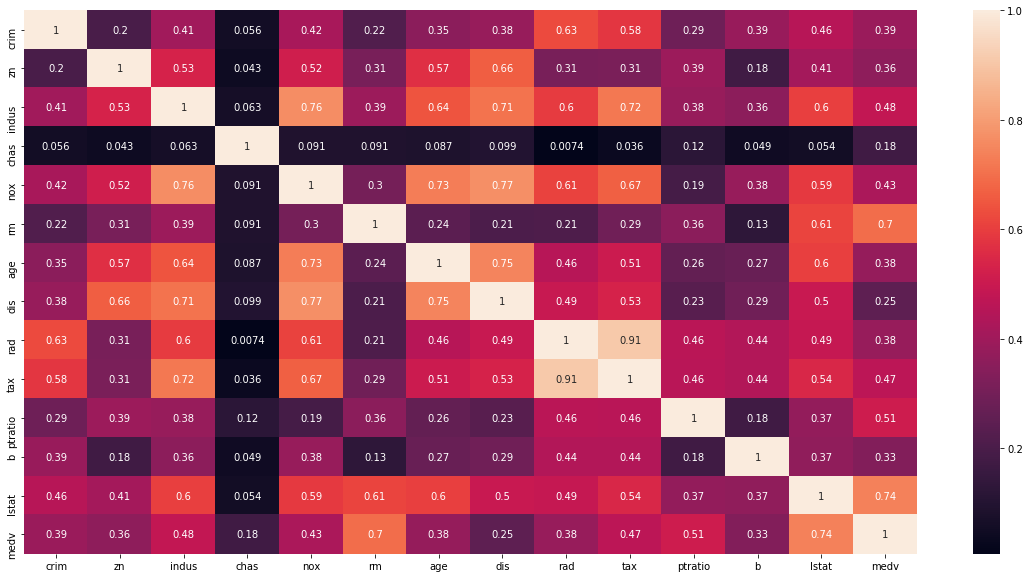

In [7]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_housing.corr().abs(),  annot=True)

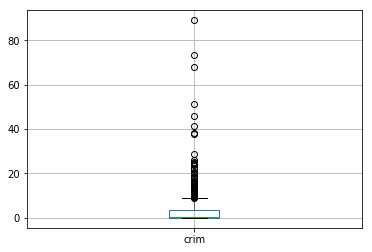

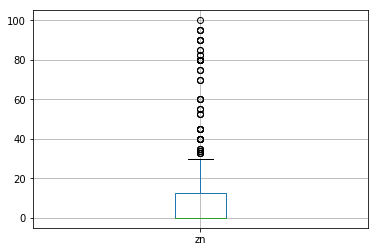

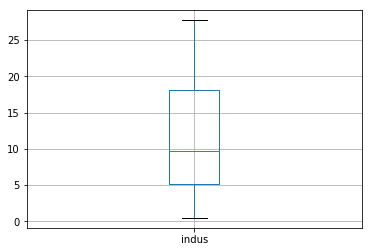

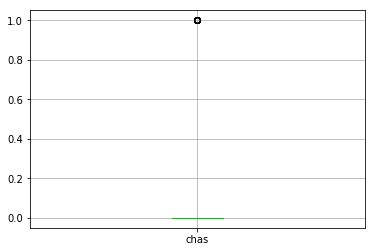

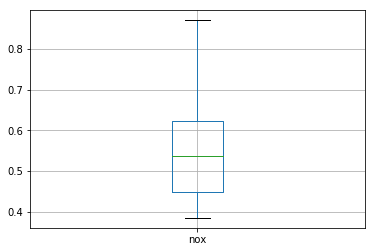

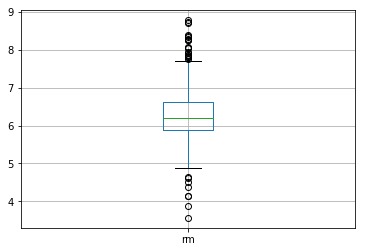

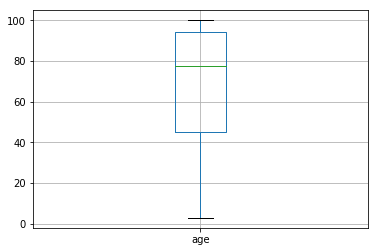

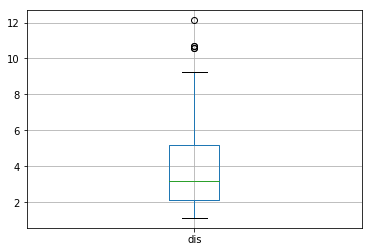

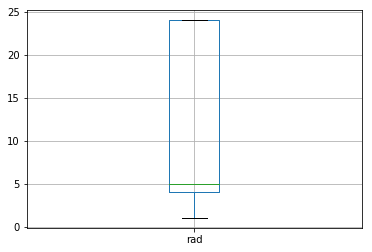

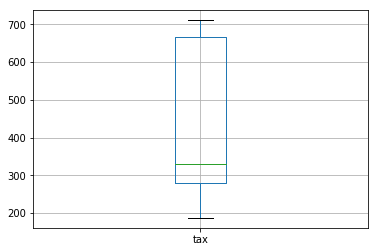

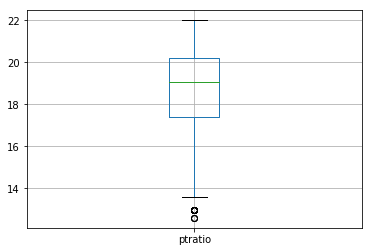

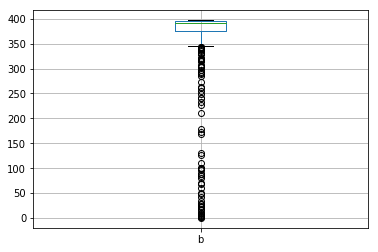

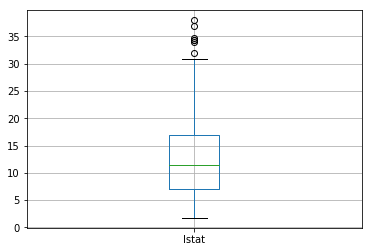

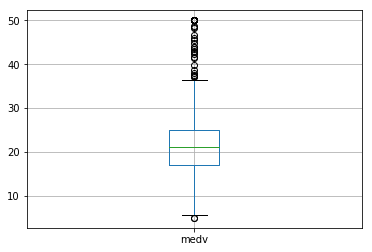

In [8]:


for column in df_housing:
    plt.figure()
    df_housing.boxplot([column])

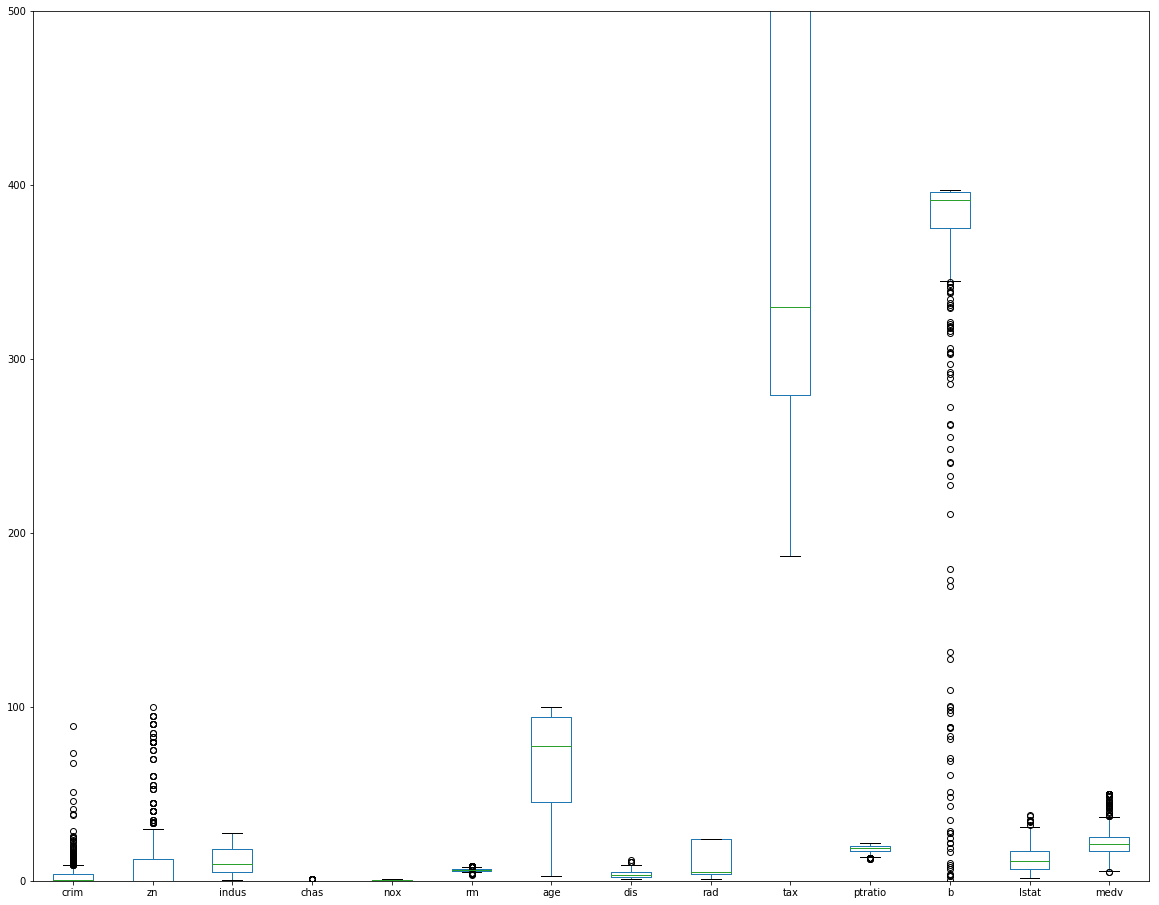

In [9]:
df_housing.plot(kind='box',figsize=(20,16),ylim=(0,500))

### Step 1:
Using Sklearn get the Boston Housing dataset.
Fit a linear regressor to the data as a baeline.  There is no need to do Cross-Validation.  We are exploring the change in results

What is the loss and what are the goodness of fit parameters?  This will be our baseline for comparison

In [10]:
column_sels = ['crim','zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax','ptratio','b','lstat']
X = df_housing.loc[:,column_sels]
y = df_housing['medv']

* standarnize 

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
#Save as data frames
X = pd.DataFrame(X)
X.columns = column_sels

In [12]:
# dataframe to hold the results
i = 0 # number of models
results = pd.DataFrame(columns=['Model','MAE','MSE','RMSE','R2'])


In [13]:

def linear_model(X, y,ModelName):
    results=[]
    lr = LinearRegression(normalize=True)
    lreg = lr.fit(X, y)
    yhat = lreg.predict(X)
    mae = mean_absolute_error(y,yhat)
    mse = mean_squared_error(y,yhat)
    RMSE = rmse(y,yhat)
    r2 = r2_score(y,yhat)
#     print("MAE: %.3f"%mae)
#     print("MSE:  %.3f"%mse)
#     print("RMSE:  %.3f"%RMSE)
#     print("R2:  %.3f"%r2)
    results.append([ModelName,mae,mse,RMSE,r2])
    return results

In [14]:
results.loc[i] = linear_model(X,y,'Original')[0]

In [15]:
results

,Model,MAE,MSE,RMSE,R2
0,Original,3.270863,21.894831,4.679191,0.740643


###  Add boxplot for all of the variable

### Step 2: (repeated)
For select between 1, 5 10, 20, 33, and 50% of your data on a single column (Completely at random), replace the present value with a NAN and then perform an imputation of that value.   

In. each case perform a fit with the imputed data and compare the loss and goodness of fit to your baseline.

In [16]:
results1 = results.copy()

In [17]:
# function to randomly drop out the values from a data frame
# credit : https://datascience.stackexchange.com/questions/30245/is-there-a-way-to-replace-existing-values-with-nan?rq=1
# changed the percent to prop for later on for MAR
def dropout(data, prop):
    # create a copy
    mat = data.copy()
    # number of values to replace
    #prop = int(mat.size * percent)
    # indices to mask
    if(prop>mat.size):
        prop=mat.size
    
    mask = random.sample(range(mat.size), prop)
    # replace with NaN
    np.put(mat, mask, [np.NaN]*len(mask))
    return mat

* we select rm as the imputation column as we think this column has more corrolation with the response variable.

In [18]:
# define imput parameters
imputeList1 = [0.01,0.05,0.1,0.2,0.33,0.50]
imputeCol = 'rm'

In [19]:
# create MCAR in rm column and impute the data with mean and fit the linear model
i=1
for imputePerct in imputeList1:
    #print(imputePerct)
    X_new =X.copy()
    # propotion to dropout
    prop = int(X_new[imputeCol].size * imputePerct)
    X_new[imputeCol]= dropout(X_new[imputeCol], prop)
    print("Dropped out number of values in column ",imputeCol,":",X_new[imputeCol].isna().sum())
    #print(X_new[imputeCol])
    X_new[imputeCol]=X_new[imputeCol].fillna(X_new[imputeCol].mean())
    
    results1.loc[i]=linear_model(X_new,y,'MCAR '+ str(imputePerct*100)+'%')[0]
    i+=1
    


Dropped out number of values in column  rm : 5
Dropped out number of values in column  rm : 25
Dropped out number of values in column  rm : 50
Dropped out number of values in column  rm : 101
Dropped out number of values in column  rm : 166
Dropped out number of values in column  rm : 253


In [20]:
results1

,Model,MAE,MSE,RMSE,R2
0,Original,3.270863,21.894831,4.679191,0.740643
1,MCAR 1.0%,3.205638,21.282489,4.613295,0.747896
2,MCAR 5.0%,3.253863,21.772248,4.666074,0.742095
3,MCAR 10.0%,3.291657,22.053228,4.696086,0.738766
4,MCAR 20.0%,3.410644,23.563750,4.854251,0.720873
5,MCAR 33.0%,3.343559,22.503984,4.743836,0.733427
6,MCAR 50.0%,3.466878,24.264374,4.925888,0.712574


* when MCAR percentage increasing MAE increasing.

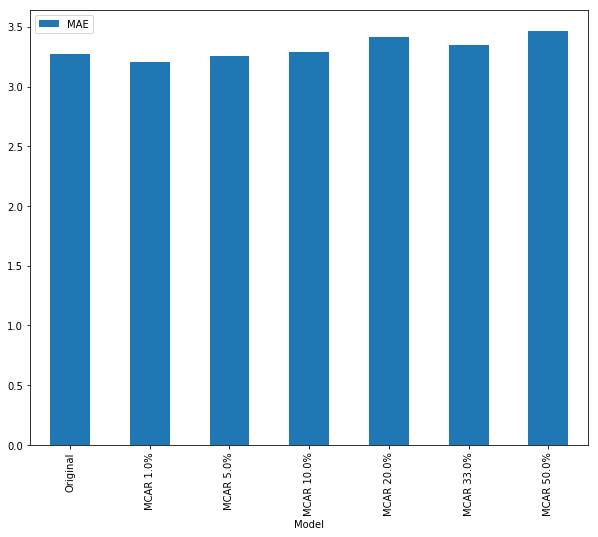

In [21]:

ax = results1.plot(kind='bar', x='Model',y='MAE', figsize  = (10,8) )

### Step 3: 
Take 2 different columns and create data “Missing at Random” when controlled for a third variable (i.e if Variable Z is > 30, than Variables X, Y are randomly missing).  Make runs with 10%, 20% and 30% missing data imputed via your best guess.  Repeat your fit and comparisons to the baseline.

* impute column b and lstat when rad greater than 4

In [22]:
# define imput parameters
imputeList2 = [0.1,0.2,0.30]
imputeCols = ['b','lstat']

In [23]:
results2 = results.copy()

In [24]:
X['rad'].describe()

count    5.060000e+02
mean     1.514379e-15
std      1.000990e+00
min     -9.828429e-01
25%     -6.379618e-01
50%     -5.230014e-01
75%      1.661245e+00
max      1.661245e+00
Name: rad, dtype: float64

In [25]:
# create MAR in b and lstat columns and impute the data with mean and fit the linear model
i=1


for imputePerct in imputeList2:
    #print(imputePerct)
    X_new =X.copy()
    # propotion to dropout
    twentyFive = X['rad'].quantile(.25)
    X_new_keep = X[X['rad']<=twentyFive]
    X_new_impute=X[X['rad']>twentyFive]
    
    for imputcol in imputeCols:
        prop = int(X_new[imputeCol].size * imputePerct)

        X_new_impute[imputeCol]= dropout(X_new_impute[imputeCol], prop)
        print("Dropped out number of values in column ",imputeCol,":",X_new_impute[imputeCol].isna().sum())
        #print(X_new[imputeCol])
        X_new_impute[imputeCol]=X_new_impute[imputeCol].fillna(X_new[imputeCol].mean())
        
    # combine 2 data frame back
    X_new_final = pd.concat([X_new_keep,X_new_impute],axis=0)
    # fit the model with final data set.
    results2.loc[i]=linear_model(X_new_final,y,'MAR '+ str(imputePerct*100)+'%')[0]
    i+=1
    

Dropped out number of values in column  rm : 50
Dropped out number of values in column  rm : 50
Dropped out number of values in column  rm : 101
Dropped out number of values in column  rm : 101
Dropped out number of values in column  rm : 151
Dropped out number of values in column  rm : 151


In [26]:
results2

,Model,MAE,MSE,RMSE,R2
0,Original,3.270863,21.894831,4.679191,0.740643
1,MAR 10.0%,5.591651,60.969969,7.808327,0.277774
2,MAR 20.0%,5.587895,60.979709,7.808951,0.277659
3,MAR 30.0%,5.587171,60.988939,7.809542,0.277550


### Step 4:  
Create a Missing Not at Random pattern in which 25% of the data is missing for a single column.    Impute your data, fit the results and compare to a baseline.

* imput column tax with MNAR when tax <=279 (25%)

In [27]:
results3 = results.copy()
imputeCol = 'tax'

In [28]:
X[imputeCol].describe()


count    5.060000e+02
mean    -9.934960e-16
std      1.000990e+00
min     -1.313990e+00
25%     -7.675760e-01
50%     -4.646726e-01
75%      1.530926e+00
max      1.798194e+00
Name: tax, dtype: float64

In [29]:
twentyFive = X[imputeCol].quantile(.25)
imputeMean = X[imputeCol].mean()

In [30]:
X_new_imput =X.copy()
X_new_imput['tax'][X_new_imput['tax']<=twentyFive] =np.nan
X_new_imput['tax'].isna().sum()


128

In [31]:
X_new_imput['tax']=X_new_imput['tax'].fillna(imputeMean)
X_new_imput['tax'].isna().sum()

0

In [32]:
i=1
results3.loc[i]=linear_model(X_new_imput,y,'MNAR 25%')[0]


In [33]:
results3

,Model,MAE,MSE,RMSE,R2
0,Original,3.270863,21.894831,4.679191,0.740643
1,MNAR 25%,3.308654,22.343945,4.726938,0.735323


### Step 5 (Extra Credit) (10 points):  
Using the MCMC method, and your data from step 4, What is the difference in performance between imputation via ‘guess’ (mean/median, etc) and MCMC.

In [34]:
data = X_new_imput.copy()

In [35]:
def calc_posterior_analytical(data, x, mu_0, sigma_0):
    sigma = 1.
    n = len(data)
    mu_post = (mu_0 / sigma_0**2 + data.sum() / sigma**2) / (1. / sigma_0**2 + n / sigma**2)
    sigma_post = (1. / sigma_0**2 + n / sigma**2)**-1
    return norm(mu_post, np.sqrt(sigma_post)).pdf(x)

In [36]:

def sampler(data, samples=4, mu_init=.5, proposal_width=.5, plot=False, mu_prior_mu=0, mu_prior_sd=1.):
    mu_current = mu_init
    posterior = [mu_current]
    for i in range(samples):
        # suggest new position
        mu_proposal = norm(mu_current, proposal_width).rvs()

        # Compute likelihood by multiplying probabilities of each data point
        likelihood_current = norm(mu_current, 1).pdf(data).prod()
        likelihood_proposal = norm(mu_proposal, 1).pdf(data).prod()
        
        # Compute prior probability of current and proposed mu        
        prior_current = norm(mu_prior_mu, mu_prior_sd).pdf(mu_current)
        prior_proposal = norm(mu_prior_mu, mu_prior_sd).pdf(mu_proposal)
        
        p_current = likelihood_current * prior_current
        p_proposal = likelihood_proposal * prior_proposal
        
        # Accept proposal?
        p_accept = p_proposal / p_current
        
        # Usually would include prior probability, which we neglect here for simplicity
        accept = np.random.rand() < p_accept
        
        if plot:
            plot_proposal(mu_current, mu_proposal, mu_prior_mu, mu_prior_sd, data, accept, posterior, i)
            
        if accept:
            # Update position
            mu_current = mu_proposal
        
        posterior.append(mu_current)
        
    return np.array(posterior)

# Function to display
def plot_proposal(mu_current, mu_proposal, mu_prior_mu, mu_prior_sd, data, accepted, trace, i):
    from copy import copy
    trace = copy(trace)
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(16, 4))
    fig.suptitle('Iteration %i' % (i + 1))
    x = np.linspace(-3, 3, 5000)
    color = 'g' if accepted else 'r'
        
    # Plot prior
    prior_current = norm(mu_prior_mu, mu_prior_sd).pdf(mu_current)
    prior_proposal = norm(mu_prior_mu, mu_prior_sd).pdf(mu_proposal)
    prior = norm(mu_prior_mu, mu_prior_sd).pdf(x)
    ax1.plot(x, prior)
    ax1.plot([mu_current] * 2, [0, prior_current], marker='o', color='b')
    ax1.plot([mu_proposal] * 2, [0, prior_proposal], marker='o', color=color)
    ax1.annotate("", xy=(mu_proposal, 0.2), xytext=(mu_current, 0.2),
                 arrowprops=dict(arrowstyle="->", lw=2.))
    ax1.set(ylabel='Probability Density', title='current: prior(mu=%.2f) = %.2f\nproposal: prior(mu=%.2f) = %.2f' % (mu_current, prior_current, mu_proposal, prior_proposal))
    
    # Likelihood
    likelihood_current = norm(mu_current, 1).pdf(data).prod()
    likelihood_proposal = norm(mu_proposal, 1).pdf(data).prod()
    y = norm(loc=mu_proposal, scale=1).pdf(x)
    sns.distplot(data, kde=False, norm_hist=True, ax=ax2)
    ax2.plot(x, y, color=color)
    ax2.axvline(mu_current, color='b', linestyle='--', label='mu_current')
    ax2.axvline(mu_proposal, color=color, linestyle='--', label='mu_proposal')
    #ax2.title('Proposal {}'.format('accepted' if accepted else 'rejected'))
    ax2.annotate("", xy=(mu_proposal, 0.2), xytext=(mu_current, 0.2),
                 arrowprops=dict(arrowstyle="->", lw=2.))
    ax2.set(title='likelihood(mu=%.2f) = %.2f\nlikelihood(mu=%.2f) = %.2f' % (mu_current, 1e14*likelihood_current, mu_proposal, 1e14*likelihood_proposal))
    
    # Posterior
    posterior_analytical = calc_posterior_analytical(data, x, mu_prior_mu, mu_prior_sd)
    ax3.plot(x, posterior_analytical)
    posterior_current = calc_posterior_analytical(data, mu_current, mu_prior_mu, mu_prior_sd)
    posterior_proposal = calc_posterior_analytical(data, mu_proposal, mu_prior_mu, mu_prior_sd)
    ax3.plot([mu_current] * 2, [0, posterior_current], marker='o', color='b')
    ax3.plot([mu_proposal] * 2, [0, posterior_proposal], marker='o', color=color)
    ax3.annotate("", xy=(mu_proposal, 0.2), xytext=(mu_current, 0.2),
                 arrowprops=dict(arrowstyle="->", lw=2.))
    #x3.set(title=r'prior x likelihood $\propto$ posterior')
    ax3.set(title='posterior(mu=%.2f) = %.5f\nposterior(mu=%.2f) = %.5f' % (mu_current, posterior_current, mu_proposal, posterior_proposal))
    
    if accepted:
        trace.append(mu_proposal)
    else:
        trace.append(mu_current)
    ax4.plot(trace)
    ax4.set(xlabel='iteration', ylabel='mu', title='trace')
    plt.tight_layout()
    #plt.legend()

# MCMC Movement

Wall time: 888 ms


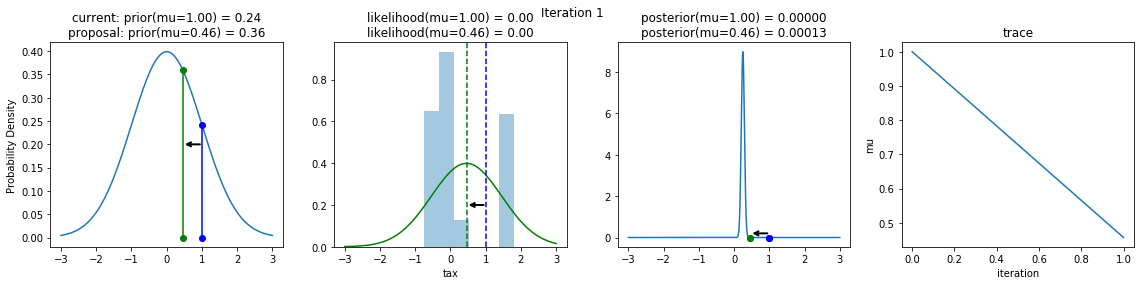

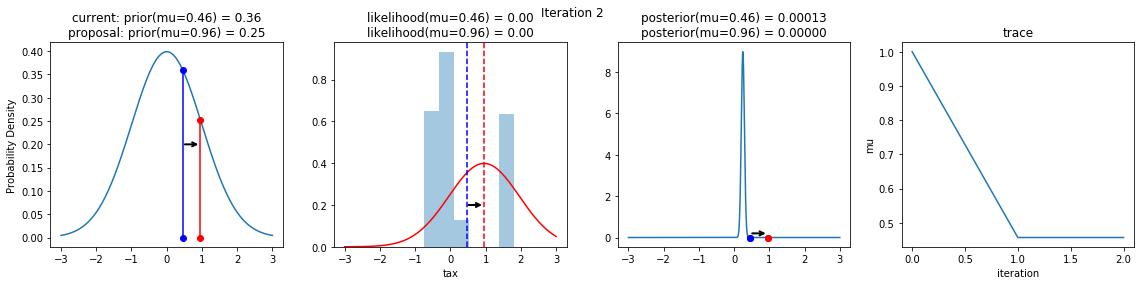

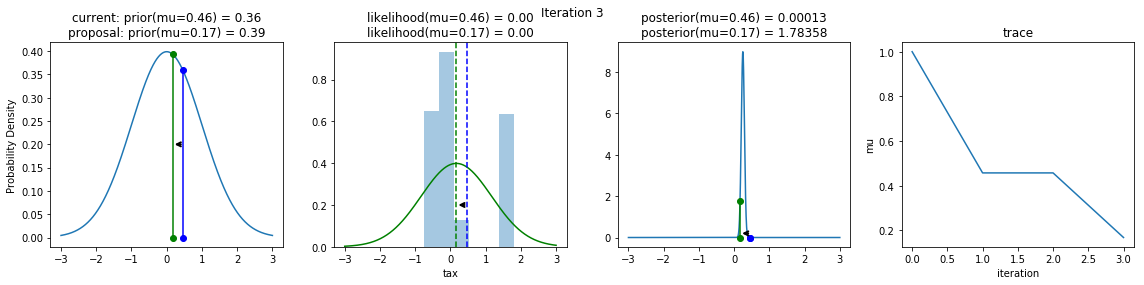

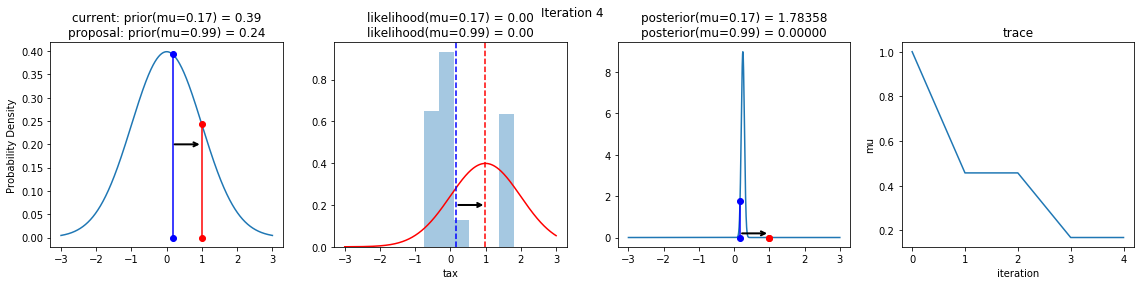

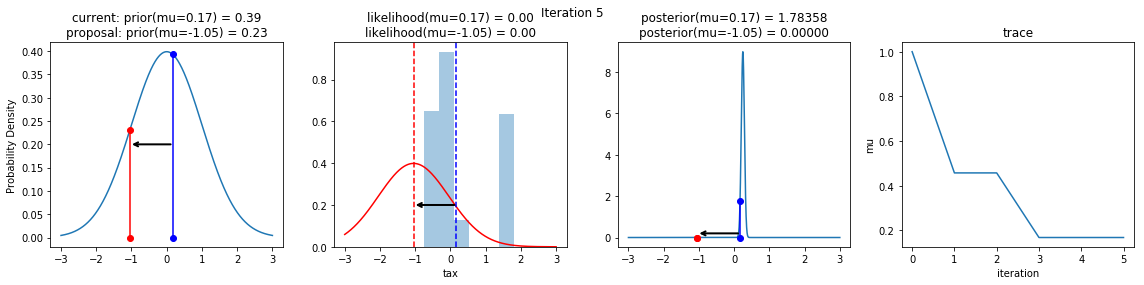

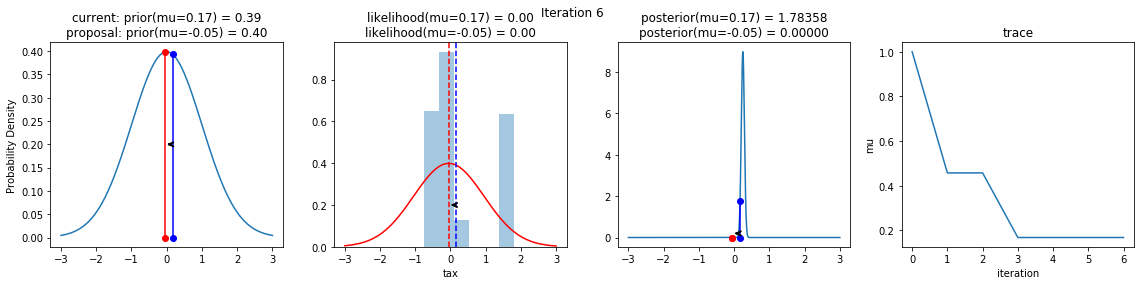

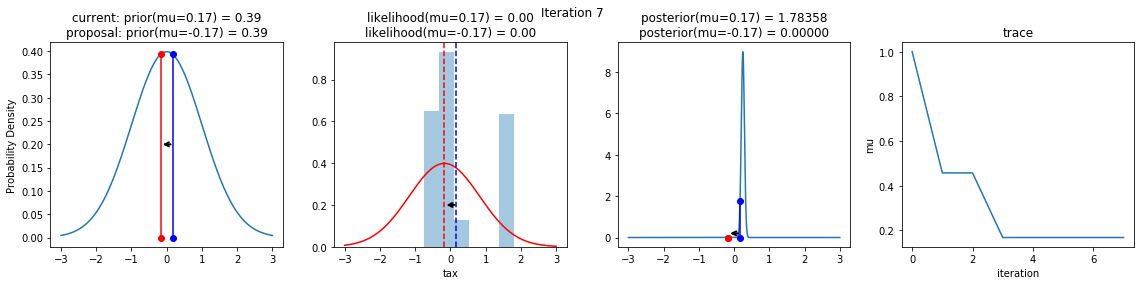

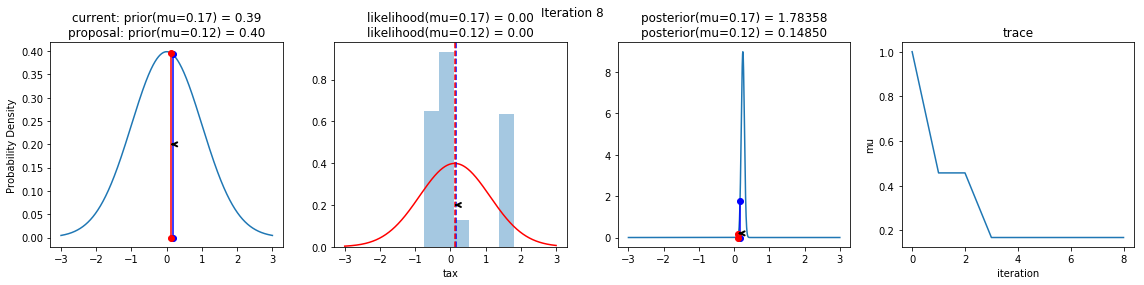

In [37]:
%%time
np.random.seed(123)
mu_current = 1
sampler(data['tax'], samples=8, mu_init=1,proposal_width=0.5,mu_prior_mu=0, plot=True);

In [38]:
%%time
np.random.seed(123)
mu_current = 1
X_new_MCMC = sampler(data['tax'], samples=len(data), mu_init=1,proposal_width=0.5,mu_prior_mu=0, plot=False);

Wall time: 1.3 s


In [39]:

data['tax']=X_new_MCMC[1:]

NameError: name 'X_new_MCMC' is not defined

In [ ]:
results4 = results3.copy()
i=2
results4.loc[i]=linear_model(data,y,'MCMC')[0]

In [ ]:
results4

# Results

In [ ]:
results1['ImputeMethod']='MCAR'
results2['ImputeMethod']='MAR'
results3['ImputeMethod']='MNAR'
results4['ImputeMethod']='MCMC'

In [ ]:
results4

In [ ]:
results = pd.concat([results1,results2[1:],results4[1:]],axis=0)

In [ ]:
figure = plt.figure(figsize=(10,9))
ax = sns.barplot(x="Model", y="MAE", hue="Model", data=results)
plt.title("Model Comprison by Different Imputation Method (by MAE)")
